Data Inspection: Importing Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
diabetes_data = pd.read_csv("diabetes.csv") 
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.describe()  
diabetes_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace({0: 'No Diabetes',
                                         1: 'Diabetes'})

In [6]:
diabetes_data['Outcome']

0         Diabetes
1      No Diabetes
2         Diabetes
3      No Diabetes
4         Diabetes
          ...     
763    No Diabetes
764    No Diabetes
765    No Diabetes
766       Diabetes
767    No Diabetes
Name: Outcome, Length: 768, dtype: object

In [7]:
diabetes_data ['Outcome'].value_counts()

Outcome
No Diabetes    500
Diabetes       268
Name: count, dtype: int64

In [8]:
X = diabetes_data.drop (columns='Outcome', axis =1)
Y = diabetes_data['Outcome']

In [9]:
print (X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print (Y)

0         Diabetes
1      No Diabetes
2         Diabetes
3      No Diabetes
4         Diabetes
          ...     
763    No Diabetes
764    No Diabetes
765    No Diabetes
766       Diabetes
767    No Diabetes
Name: Outcome, Length: 768, dtype: object


In [11]:
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
missing = diabetes_data.isnull().sum()  
missing  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
duplicates = diabetes_data.duplicated().sum() 
duplicates 

np.int64(0)

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
standarized_data = scaler.transform(X)
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X = standarized_data
Y = diabetes_data['Outcome']

In [18]:
print (X)
print (Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0         Diabetes
1      No Diabetes
2         Diabetes
3      No Diabetes
4         Diabetes
          ...     
763    No Diabetes
764    No Diabetes
765    No Diabetes
766       Diabetes
767    No Diabetes
Name: Outcome, Length: 768, dtype: object


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size= 0.2, stratify=Y, random_state=2)
print (X.shape, X_test.shape, X_train.shape)

(768, 8) (154, 8) (614, 8)


Menghapus outlier

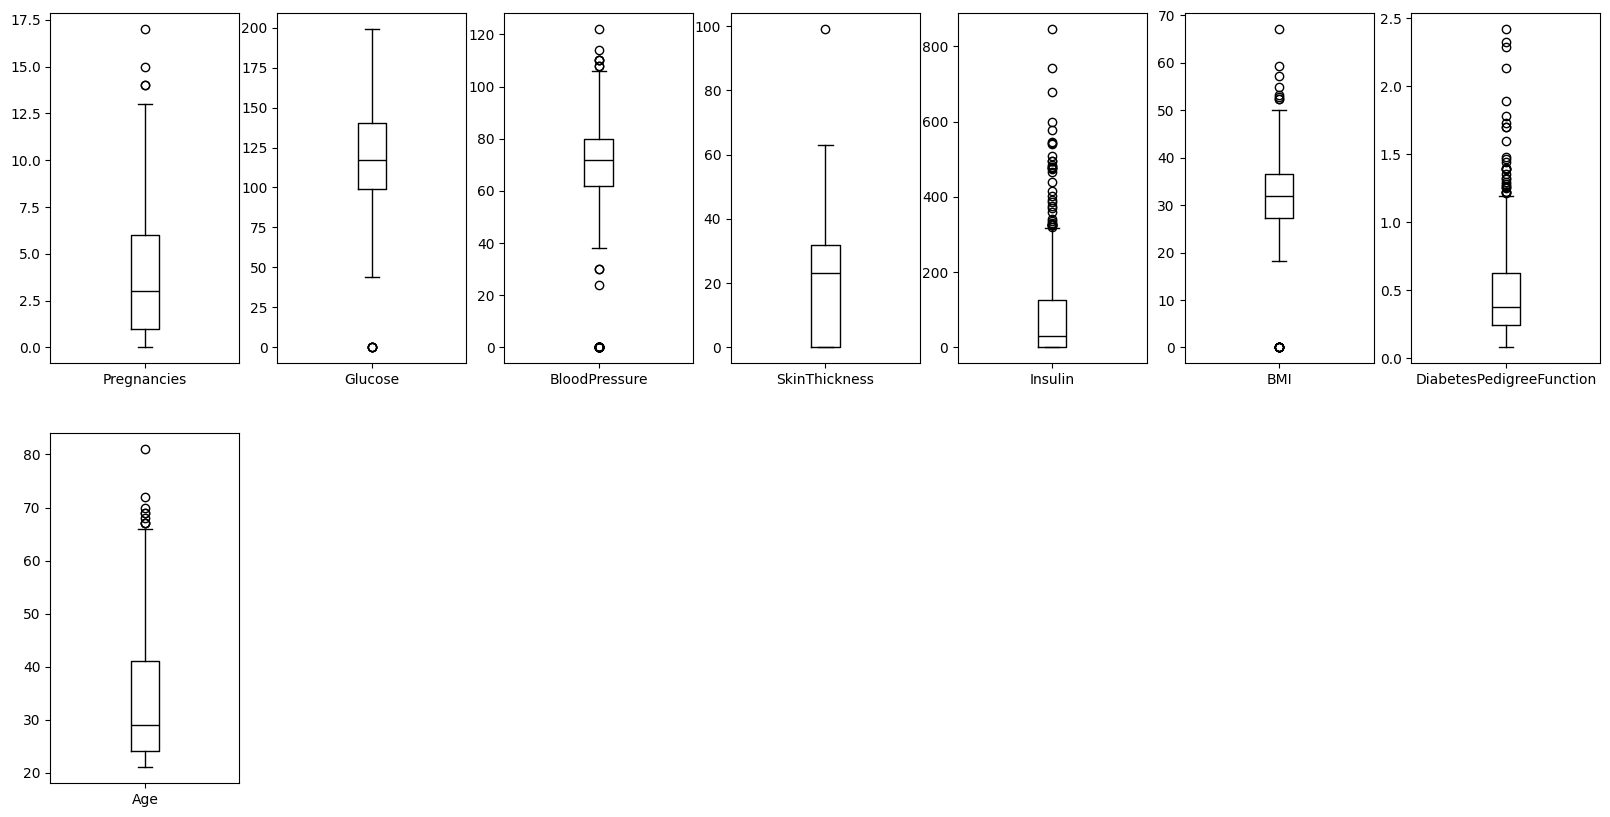

In [20]:
diabetes_data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

In [21]:
continous_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

def outliers(data_out, drop = False):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            diabetes_data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(diabetes_data[continous_features])

For the feature Pregnancies, Num of Outliers is 4
For the feature Glucose, Num of Outliers is 5
For the feature BloodPressure, Num of Outliers is 45
For the feature SkinThickness, Num of Outliers is 1
For the feature Insulin, Num of Outliers is 34
For the feature BMI, Num of Outliers is 19
For the feature DiabetesPedigreeFunction, Num of Outliers is 29
For the feature Age, Num of Outliers is 9


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

In [31]:
outliers(diabetes_data[continous_features],drop=True)

Outliers from Pregnancies feature removed
Outliers from Glucose feature removed
Outliers from BloodPressure feature removed
Outliers from SkinThickness feature removed
Outliers from Insulin feature removed
Outliers from BMI feature removed
Outliers from DiabetesPedigreeFunction feature removed
Outliers from Age feature removed


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

In [32]:
outliers(diabetes_data[continous_features])

For the feature Pregnancies, Num of Outliers is 0
For the feature Glucose, Num of Outliers is 0
For the feature BloodPressure, Num of Outliers is 0
For the feature SkinThickness, Num of Outliers is 0
For the feature Insulin, Num of Outliers is 0
For the feature BMI, Num of Outliers is 0
For the feature DiabetesPedigreeFunction, Num of Outliers is 0
For the feature Age, Num of Outliers is 0


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

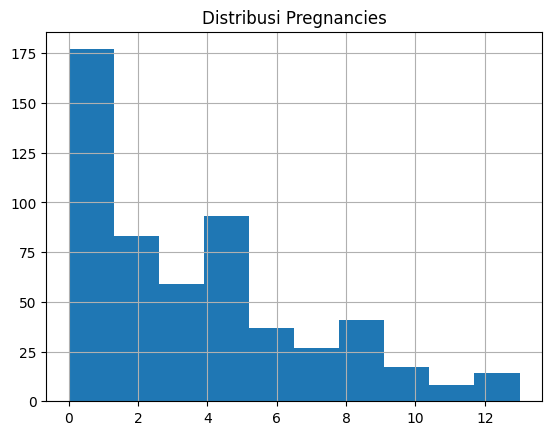

In [33]:
diabetes_data['Pregnancies'].hist().plot(kind='bar')
plt.title('Distribusi Pregnancies')
plt.show()

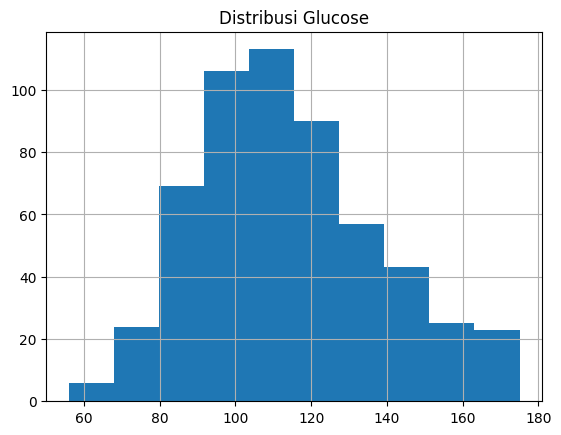

In [34]:
diabetes_data['Glucose'].hist().plot(kind='bar')
plt.title('Distribusi Glucose')
plt.show()

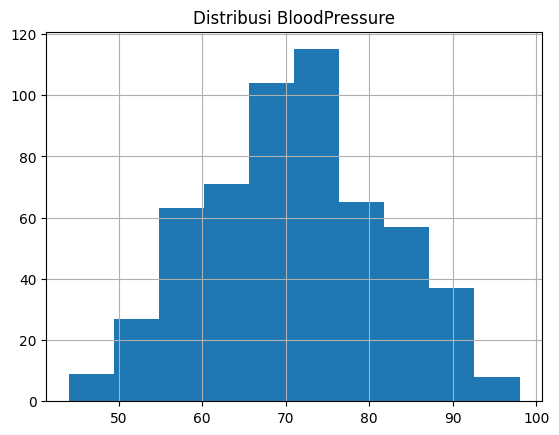

In [35]:
diabetes_data['BloodPressure'].hist().plot(kind='bar')
plt.title('Distribusi BloodPressure')
plt.show()

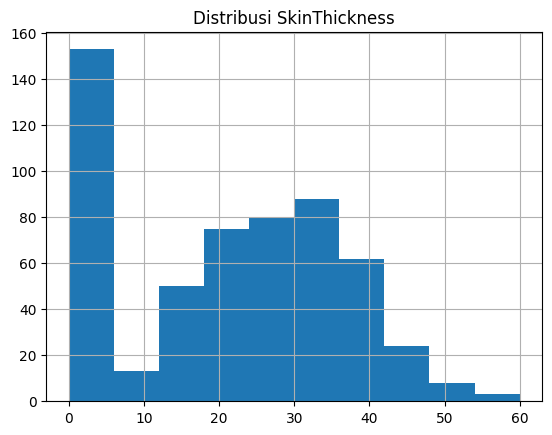

In [36]:
diabetes_data['SkinThickness'].hist().plot(kind='bar')
plt.title('Distribusi SkinThickness')
plt.show()

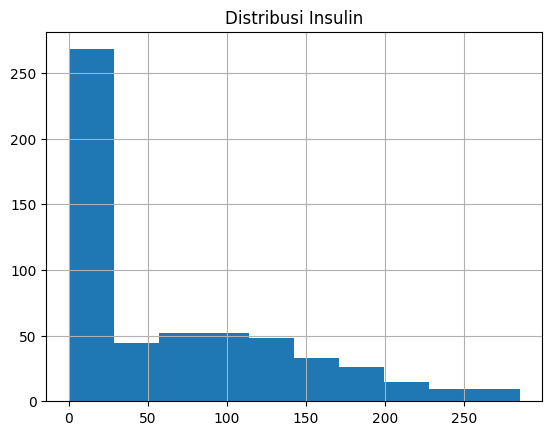

In [37]:
diabetes_data['Insulin'].hist().plot(kind='bar')
plt.title('Distribusi Insulin')
plt.show()

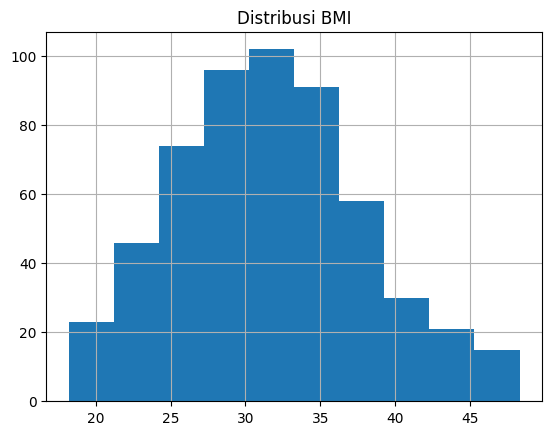

In [38]:
diabetes_data['BMI'].hist().plot(kind='bar')
plt.title('Distribusi BMI')
plt.show()

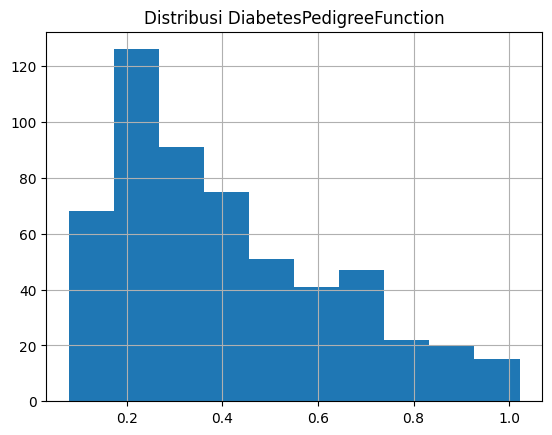

In [39]:
diabetes_data['DiabetesPedigreeFunction'].hist().plot(kind='bar')
plt.title('Distribusi DiabetesPedigreeFunction')
plt.show()

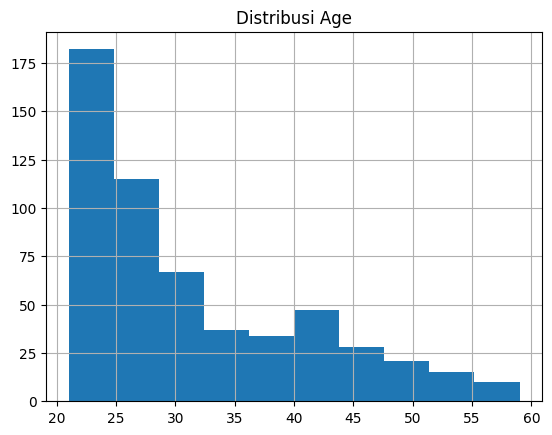

In [40]:
diabetes_data['Age'].hist().plot(kind='bar')
plt.title('Distribusi Age')
plt.show()

In [41]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,3.687050,114.052158,71.206835,20.492806,62.794964,31.617086,0.410581,31.167266
std,3.220863,24.316438,10.645069,15.212310,73.911520,6.274195,0.226119,9.639020
min,0.000000,56.000000,44.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,97.000000,64.000000,0.000000,0.000000,26.975000,0.237000,23.000000
50%,3.000000,111.000000,72.000000,23.000000,40.500000,31.600000,0.349000,28.000000
75%,6.000000,129.000000,78.000000,32.000000,114.250000,35.625000,0.557500,38.000000
max,13.000000,175.000000,98.000000,60.000000,285.000000,48.300000,1.022000,59.000000


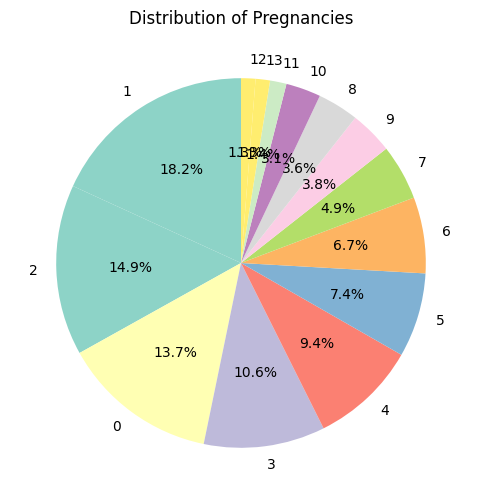

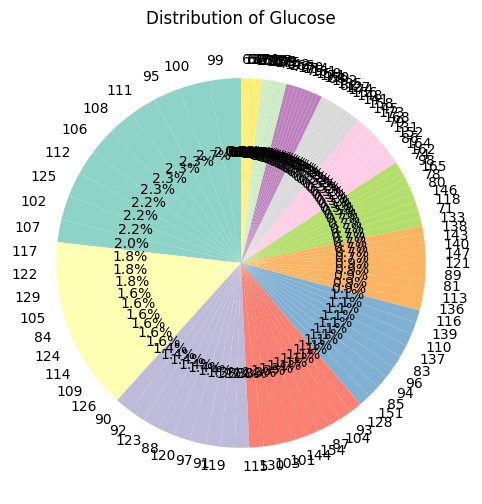

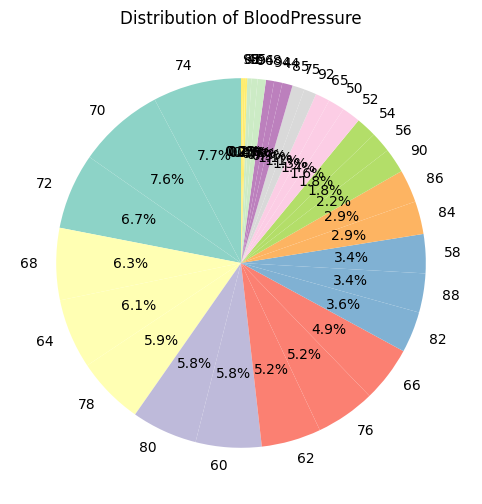

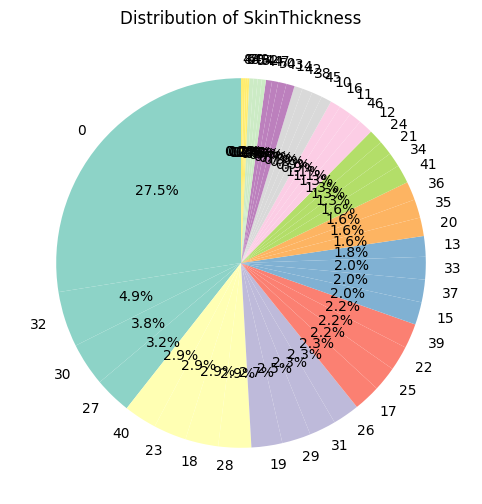

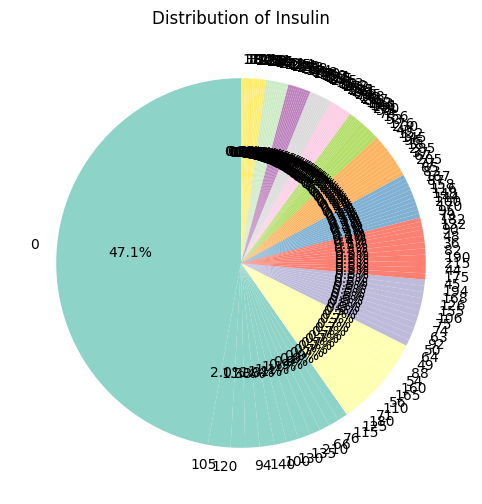

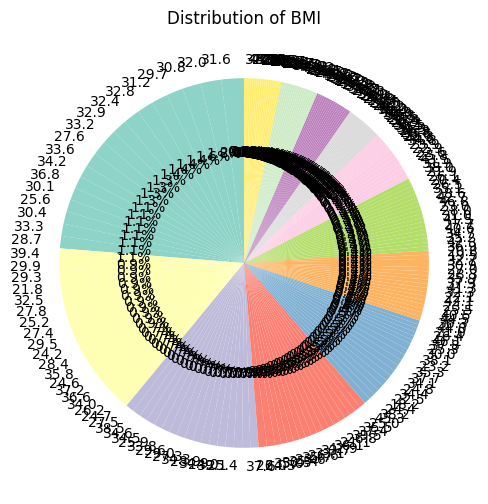

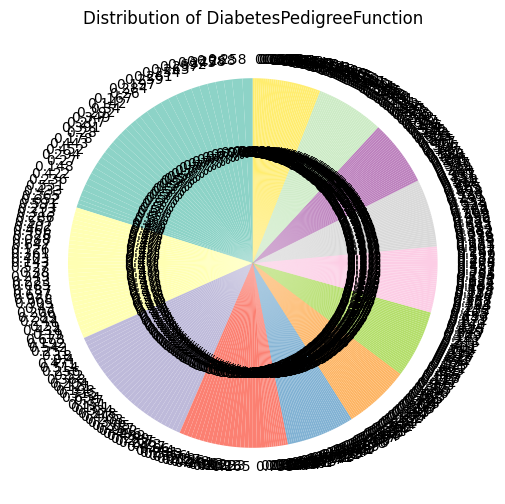

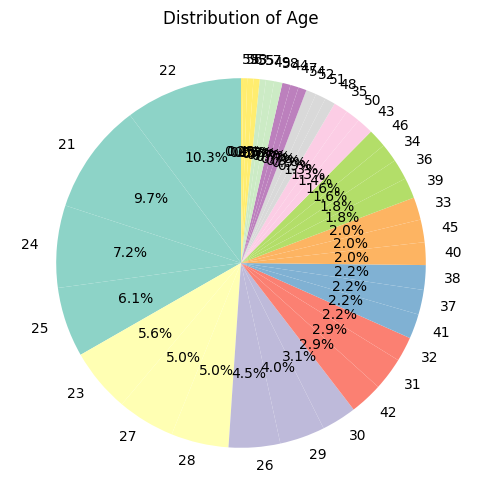

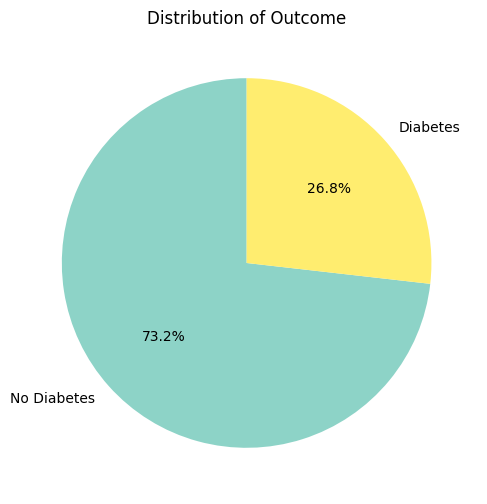

In [47]:
def plot_pie_chart(data, features):
    for feature in features:
        plt.figure(figsize=(8, 6))
        
        # Menghitung proporsi kategori
        data[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
        
        plt.title(f'Distribution of {feature}')
        plt.ylabel('')  # Tidak perlu label untuk grafik pie
        plt.show()

# Asumsi diabetes_data adalah DataFrame Anda
plot_pie_chart(diabetes_data, continous_features)

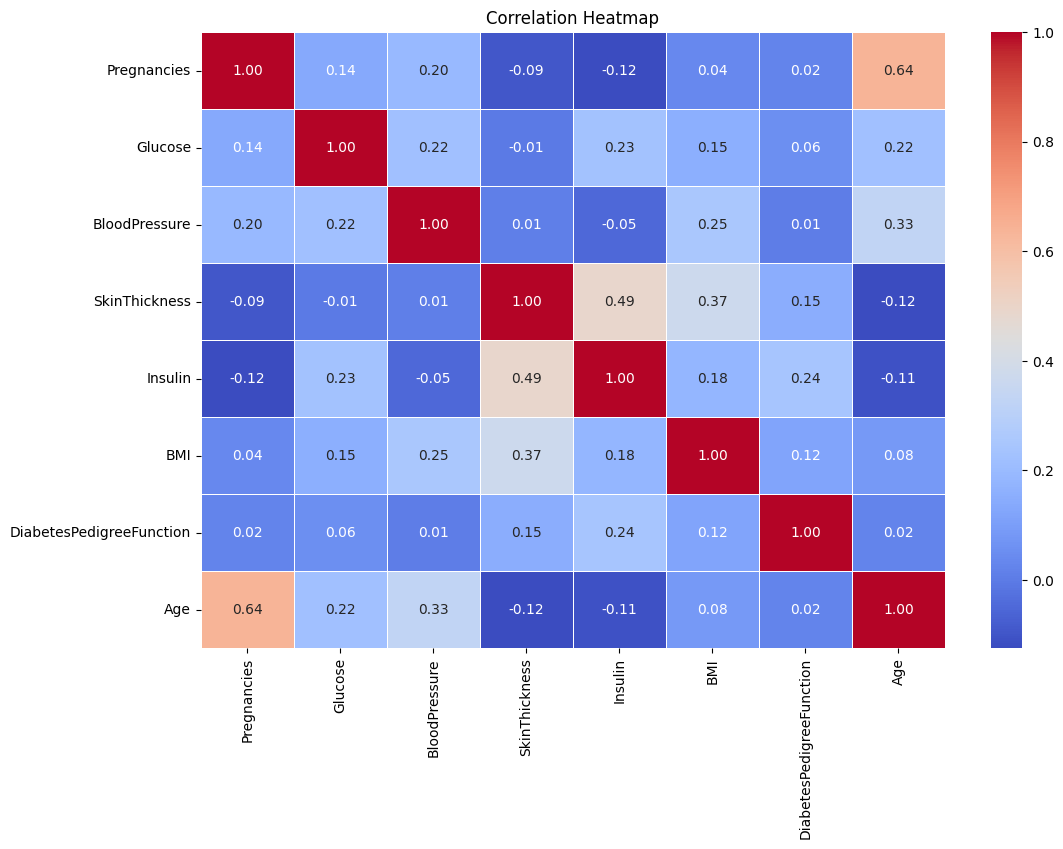

In [48]:
def plot_correlation_heatmap(data):
    
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    corr_matrix = numeric_data.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    plt.title('Correlation Heatmap')
    plt.show()
    
plot_correlation_heatmap(diabetes_data)

In [49]:
def display_correlation_table(data):

    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    corr_matrix = numeric_data.corr()
    print("Correlation Matrix:")
    print(corr_matrix)

display_correlation_table(diabetes_data)

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.135459       0.196070      -0.094739   
Glucose                      0.135459  1.000000       0.221945      -0.005213   
BloodPressure                0.196070  0.221945       1.000000       0.012043   
SkinThickness               -0.094739 -0.005213       0.012043       1.000000   
Insulin                     -0.124026  0.229386      -0.053348       0.486622   
BMI                          0.035903  0.152932       0.251797       0.368988   
DiabetesPedigreeFunction     0.023478  0.055723       0.007455       0.149839   
Age                          0.639163  0.219497       0.330652      -0.123725   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.124026  0.035903                  0.023478   
Glucose                   0.229386  0.152932                  0.055723   
BloodPressure            -0.

In [50]:
import pandas as pd

def display_sorted_correlation(data):
    
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    corr_matrix = numeric_data.corr()
    
    corr_stack = corr_matrix.stack()
    
    sorted_corr = corr_stack.sort_values(ascending=False)
    
    print("Sorted Correlation Matrix:")
    print(sorted_corr)

display_sorted_correlation(diabetes_data)

Sorted Correlation Matrix:
Pregnancies               Pregnancies                 1.000000
Glucose                   Glucose                     1.000000
DiabetesPedigreeFunction  DiabetesPedigreeFunction    1.000000
BMI                       BMI                         1.000000
Insulin                   Insulin                     1.000000
                                                        ...   
Age                       Insulin                    -0.106722
SkinThickness             Age                        -0.123725
Age                       SkinThickness              -0.123725
Pregnancies               Insulin                    -0.124026
Insulin                   Pregnancies                -0.124026
Length: 64, dtype: float64


In [ ]:
print(diabetes_data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
print(diabetes_data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object


In [ ]:
print(diabetes_data['Outcome'].unique())

['Diabetes' 'No Diabetes']


In [52]:
diabetes_data['Outcome'] = diabetes_data['Outcome'].map({'Diabetes': 1, 'No Diabetes': 0})

# Cek hasil konversi
print(diabetes_data['Outcome'].head())

0   NaN
1   NaN
3   NaN
5   NaN
6   NaN
Name: Outcome, dtype: float64


In [53]:
def correlation_with_outcome(data, target_column):
    # Memastikan kolom target ada dalam dataset
    if target_column not in data.columns:
        print(f"Kolom '{target_column}' tidak ditemukan dalam dataset.")
        return
    
    # Memilih hanya kolom numerik
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Mengonversi kolom target menjadi numerik jika perlu
    if data[target_column].dtype != 'int64' and data[target_column].dtype != 'float64':
        data[target_column] = pd.to_numeric(data[target_column], errors='coerce')
    
    # Hitung matriks korelasi
    corr_matrix = numeric_data.corr()
    
    # Ambil korelasi antara semua fitur dengan kolom target
    outcome_corr = corr_matrix[target_column]
    
    # Tampilkan korelasi variabel dengan 'Outcome'
    print(f"Correlation with {target_column}:")
    print(outcome_corr.sort_values(ascending=False))

# Memastikan kolom 'Outcome' ada dalam dataset dan menjalankan fungsi
correlation_with_outcome(diabetes_data, 'Outcome')

Correlation with Outcome:
Pregnancies                NaN
Glucose                    NaN
BloodPressure              NaN
SkinThickness              NaN
Insulin                    NaN
BMI                        NaN
DiabetesPedigreeFunction   NaN
Age                        NaN
Outcome                    NaN
Name: Outcome, dtype: float64


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diabetes_data.drop("Outcome", axis=1))

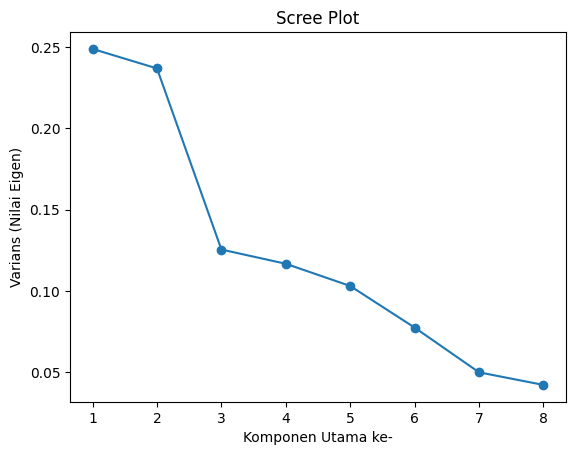

In [55]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

**Pemodelan dengan Diabetes dataset**
logistic regression, decision tree, random forest dan neural networks.

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
# Inisialisasi model Logistic Regression
dlf = LogisticRegression()
dlf.fit(X_train, Y_train)
y_pred = dlf.predict(X_test)
print("The test accuracy score of Logistic Regression Classifier is ", accuracy_score(Y_test, y_pred))

The test accuracy score of Logistic Regression Classifier is  0.8311688311688312


In [58]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    Diabetes       0.82      0.67      0.73        54
 No Diabetes       0.84      0.92      0.88       100

    accuracy                           0.83       154
   macro avg       0.83      0.79      0.81       154
weighted avg       0.83      0.83      0.83       154



In [59]:
#Decision Tree 
dlf = DecisionTreeClassifier(random_state=100)
dlf.fit(X_train, Y_train)
y_pred = dlf.predict(X_test)
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(Y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7532467532467533


In [60]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    Diabetes       0.63      0.72      0.67        54
 No Diabetes       0.84      0.77      0.80       100

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



In [61]:
# Random Forest
dlf = RandomForestClassifier(random_state=100)
dlf.fit(X_train, Y_train)
y_pred = dlf.predict(X_test)
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(Y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.8116883116883117


In [62]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    Diabetes       0.76      0.69      0.72        54
 No Diabetes       0.84      0.88      0.86       100

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



In [63]:
from sklearn.neural_network import MLPClassifier
# MLP
dlf = MLPClassifier(random_state=100, max_iter=1000)
dlf.fit(X_train, Y_train)
y_pred = dlf.predict(X_test)
print("The test accuracy score of MLP Classifier is ", accuracy_score(Y_test, y_pred))

The test accuracy score of MLP Classifier is  0.8246753246753247


In [64]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    Diabetes       0.76      0.72      0.74        54
 No Diabetes       0.85      0.88      0.87       100

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



**Proses Hyperparameter Tuning**

In [65]:
#Logistic regression classifier with hyperparameter
dlf = LogisticRegression(random_state=100)
param_grid = {
    'max_iter': [100, 200, 300],  
    'multi_class': ['auto', 'ovr', 'multinomial'],  
    'solver': ['liblinear', 'lbfgs', 'saga']  
}
gs1 = GridSearchCV(
        estimator=dlf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_dlf_lg = gs1.fit(X_train, Y_train) 
print(fit_dlf_lg.best_params_) 
print(fit_dlf_lg.best_score_)  

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}
0.8115088593576967


In [66]:
y_pred = fit_dlf_lg.predict(X_test)  
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    Diabetes       0.82      0.67      0.73        54
 No Diabetes       0.84      0.92      0.88       100

    accuracy                           0.83       154
   macro avg       0.83      0.79      0.81       154
weighted avg       0.83      0.83      0.83       154



Setelah dilakukan hyperparameter tuning model logistic regression Nilai akurasi sama yaitu 83%.

In [67]:
# Random Forest classifier with hyperparameter
dlf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],  
               'max_depth': [None, 10, 20, 30],  
               'criterion': ['gini', 'entropy']}  
gs1 = GridSearchCV(
        estimator=dlf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_dlf_rf = gs1.fit(X_train, Y_train)  
print(fit_dlf_rf.best_params_)  
print(fit_dlf_rf.best_score_)  

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 200}
0.8174473975636765


In [68]:
y_pred = fit_dlf_rf.predict(X_test)  
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    Diabetes       0.76      0.69      0.72        54
 No Diabetes       0.84      0.88      0.86       100

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



Setelah dilakukan hyperparameter tuning model Random Forest Nilai akurasi mengalami keniakan yaitu dari 81% menjadi 82%

In [69]:
# Decision Tree classifier with hyperparameter
dlf = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [1, 5, 10],  
               'max_depth': [None, 10, 20, 30],  
               'criterion': ['gini', 'entropy']}  
gs1 = GridSearchCV(
        estimator=dlf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_dlf_dt = gs1.fit(X_train, Y_train)  
print(fit_dlf_dt.best_params_)  
print(fit_dlf_dt.best_score_)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 10}
0.7665081672203765


In [70]:
y_pred = fit_dlf_dt.predict(X_test)  
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    Diabetes       0.76      0.69      0.72        54
 No Diabetes       0.84      0.88      0.86       100

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



Setelah dilakukan hyperparameter tuning model Decision Tree Nilai akurasi mengalami keniakan yaitu dari 75% menjadi 81%

In [71]:
# MLP Classifier with hyperparameter
dlf = MLPClassifier(max_iter=1000, random_state=100)
param_grid1 = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],  
               'activation': ['relu', 'tanh'],  
               'solver': ['adam', 'sgd']}  
gs1 = GridSearchCV(
        estimator=dlf,
        param_grid=param_grid1, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_dlf_mlp = gs1.fit(X_train, Y_train)  
print(fit_dlf_mlp.best_params_)  
print(fit_dlf_mlp.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'solver': 'sgd'}
0.8135243632336657


In [72]:
y_pred = fit_dlf_mlp.predict(X_test)  
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    Diabetes       0.80      0.67      0.73        54
 No Diabetes       0.83      0.91      0.87       100

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



Setelah dilakukan hyperparameter tuning model MLP Classifier Nilai akurasi tidak mengalami kenaikan di 82%

**ROC ANALYSYT**

In [73]:
y_pred_logreg = fit_dlf_lg.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Logistic Regression
y_pred_rf = fit_dlf_rf.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Random Forest
y_pred_dt = fit_dlf_dt.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Decision Tree
y_pred_mlp = fit_dlf_mlp.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk MLP

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(Y_test, y_pred_logreg)  # AUC-ROC untuk Logistic Regression
auc_rf = roc_auc_score(Y_test, y_pred_rf)  # AUC-ROC untuk Random Forest
auc_dt = roc_auc_score(Y_test, y_pred_dt)  # AUC-ROC untuk Decision Tree
auc_mlp = roc_auc_score(Y_test, y_pred_mlp)  # AUC-ROC untuk MLP

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.8890740740740741
AUC-ROC for Random Forest: 0.8626851851851851
AUC-ROC for Decision Tree: 0.820648148148148
AUC-ROC for MLP: 0.8951851851851852


Jika dilihat dari nilai AUC-ROC, model MLP memiliki nilai yang paling tinggi. Akan tetapi perbedaan nilai AUC-ROC MLP dengan 1 model lainnya tidak terpaut jauh dengan logistic regression.

ROC adalah kurva probabilitas dan AUC mewakili tingkat atau ukuran pemisahan. Ini menunjukkan seberapa baik model mampu membedakan antara kelas. Semakin tinggi AUC, semakin baik modelnya dalam memprediksi kelas 0 sebagai 0 dan kelas 1 sebagai 1.

Kurva ROC digambarkan dengan TPR (True Positive Rate) melawan FPR (False Positive Rate) di mana TPR berada di sumbu y dan FPR berada di sumbu x.

Model yang sangat baik memiliki AUC mendekati 1, yang berarti memiliki ukuran pemisahan yang baik. Model yang buruk memiliki AUC mendekati 0, yang berarti memiliki ukuran pemisahan yang terburuk.

Ketika AUC adalah 0.7, artinya ada peluang sebesar 70% bahwa model akan mampu membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0.5, model tidak memiliki kemampuan diskriminasi untuk membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0, model memprediksi kelas negatif sebagai kelas positif dan sebaliknya.

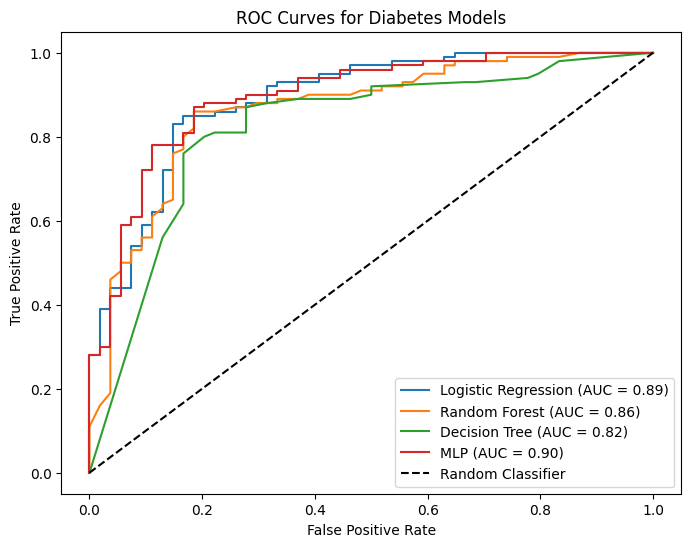

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Mengonversi label kategorikal menjadi angka
label_encoder = LabelEncoder()
Y_test_encoded = label_encoder.fit_transform(Y_test)

# Menghitung ROC untuk setiap model
fpr_logreg, tpr_logreg, _ = roc_curve(Y_test_encoded, y_pred_logreg)
fpr_rf, tpr_rf, _ = roc_curve(Y_test_encoded, y_pred_rf)
fpr_dt, tpr_dt, _ = roc_curve(Y_test_encoded, y_pred_dt)
fpr_mlp, tpr_mlp, _ = roc_curve(Y_test_encoded, y_pred_mlp)

# Menghitung AUC
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_dt = auc(fpr_dt, tpr_dt)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

# Plot random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Format the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Diabetes Models')
plt.legend()
plt.show()

In [77]:
def find_rates_for_thresholds(y_true, y_pred_prob, thresholds):
    fpr = []
    tpr = []
    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))

        fpr_value = fp / (fp + tn) if (fp + tn) != 0 else 0
        tpr_value = tp / (tp + fn) if (tp + fn) != 0 else 0

        fpr.append(fpr_value)
        tpr.append(tpr_value)

    return fpr, tpr

In [78]:
thresholds = np.arange(0, 1.1, 0.1) #menggunakan treshold 0 -1

fpr_logreg, tpr_logreg = find_rates_for_thresholds(Y_test, y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(Y_test, y_pred_rf, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(Y_test, y_pred_dt, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(Y_test, y_pred_mlp, thresholds)

# Buat DataFrame

summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'Logistic Regression FPR': fpr_logreg,
    'Logistic Regression TPR': tpr_logreg,
    'Random Forest FPR': fpr_rf,
    'Random Forest TPR': tpr_rf,
    'Decision Tree FPR': fpr_dt,
    'Decision Tree TPR': tpr_dt,
    'MLP FPR': fpr_mlp,
    'MLP TPR': tpr_mlp
})

print(summary_df)

    Threshold  Logistic Regression FPR  Logistic Regression TPR  \
0         0.0                 1.000000                        0   
1         0.1                 0.961039                        0   
2         0.2                 0.922078                        0   
3         0.3                 0.850649                        0   
4         0.4                 0.740260                        0   
5         0.5                 0.714286                        0   
6         0.6                 0.642857                        0   
7         0.7                 0.564935                        0   
8         0.8                 0.422078                        0   
9         0.9                 0.188312                        0   
10        1.0                 0.000000                        0   

    Random Forest FPR  Random Forest TPR  Decision Tree FPR  \
0            1.000000                  0           1.000000   
1            0.993506                  0           0.896104   
2     

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

def find_best_threshold(Y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    valid_mask = ~np.isinf(thresholds)
    fpr = fpr[valid_mask]
    tpr = tpr[valid_mask]
    thresholds = thresholds[valid_mask]

    # mencari threshold dengan TPR - FPR maksimum (Youden Index)
    optimal_idx = np.argmax(tpr - fpr)
    return thresholds[optimal_idx]

y_pred_logreg = fit_dlf_lg.predict_proba(X_test)[:, 1]
y_pred_rf = fit_dlf_rf.predict_proba(X_test)[:, 1]
y_pred_dt = fit_dlf_dt.predict_proba(X_test)[:, 1]
y_pred_mlp = fit_dlf_mlp.predict_proba(X_test)[:, 1]

best_threshold_logreg = find_best_threshold(Y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(Y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(Y_test, y_pred_dt)
best_threshold_mlp = find_best_threshold(Y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")


Best threshold for Logistic Regression: 0.9972031649240972
Best threshold for Random Forest: 1.0
Best threshold for Decision Tree: 1.0
Best threshold for MLP: 0.9980087944542753


In [ ]:
import pickle

# Menyimpan model terbaik dengan pickle
pklname = 'diabetes_model.sav'  # Nama file untuk menyimpan model
with open(pklname, 'wb') as file:  
    pickle.dump(fit_dlf_rf, file)